In [1]:
# imports
from openai import OpenAI  # OpenAI Python library to make API calls
import requests  # used to download images
import os  # used to access filepaths
from PIL import Image  # used to print and edit images
from dotenv import load_dotenv

load_dotenv()  # take environment variables from .env.

# initialize OpenAI client
client = OpenAI(api_key=os.environ.get("OPENAI_API_KEY"))


In [2]:
# set a directory to save DALL·E images to
image_dir_name = "images"
image_dir = os.path.join(os.curdir, image_dir_name)

# create the directory if it doesn't yet exist
if not os.path.isdir(image_dir):
    os.mkdir(image_dir)

# print the directory to save to
print(f"{image_dir=}")


image_dir='./images'


In [3]:
# create an image

# set the prompt
prompt = "futuristic pyramids of giza in the style of technology"

# call the OpenAI API
generation_response = client.images.generate(
    model = "dall-e-3",
    prompt=prompt,
    n=1,
    size="1024x1024",
    response_format="url",
)

# print response
print(generation_response)

ImagesResponse(created=1711424054, data=[Image(b64_json=None, revised_prompt='Picture the pyramids of Giza infused with a futuristic ambiance. Imagine large, imposing structures that are already an architectural marvel, now enriched with an advanced technological look. Glossy reflective surfaces adorn the pyramids, with sleek lines and embellishments representing advanced tech. Brightly coloured neon lights criss-cross the surface in intricate designs, showcasing a delicate balance between monumental historical architecture and the sophistication of upcoming technology. Futuristic vehicles swoop around it amidst a night sky awash with stars, creating a vision of how these ancient wonders could look in a technologically advanced future.', url='https://oaidalleapiprodscus.blob.core.windows.net/private/org-I0yk4x97NjPA2smpvRvcQtAM/user-n08uDCjiCsgFupTJEWWYOQ7E/img-eLgTZINvQ2vlLDCPfhPV8muZ.png?st=2024-03-26T02%3A34%3A14Z&se=2024-03-26T04%3A34%3A14Z&sp=r&sv=2021-08-06&sr=b&rscd=inline&rsct=

In [4]:
# save the image
generated_image_name = "generated_image.png"  # any name you like; the filetype should be .png
generated_image_filepath = os.path.join(image_dir, generated_image_name)
generated_image_url = generation_response.data[0].url  # extract image URL from response
generated_image = requests.get(generated_image_url).content  # download the image

with open(generated_image_filepath, "wb") as image_file:
    image_file.write(generated_image)  # write the image to the file

./images/generated_image.png


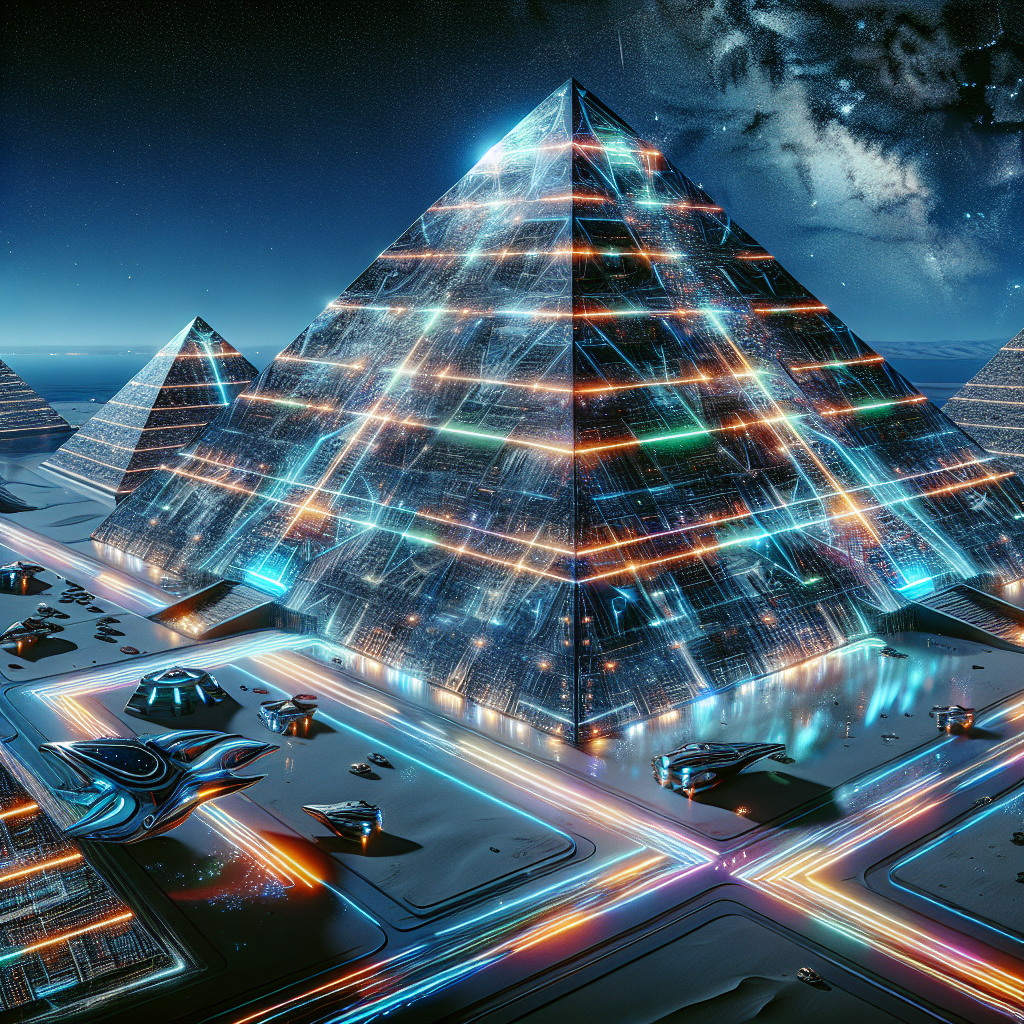

In [5]:
# print the image
print(generated_image_filepath)
display(Image.open(generated_image_filepath))
